In [3]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# I. 간단한 선형회귀(딥러닝으로)

## building toy dataset

In [7]:
x_values = [i for i in range(11)] # 0~10

# convert to numpy
x_train = np.array(x_values, dtype = np.float32)
print('shape of x_train: {}'.format(x_train.shape))

# convert to 2-dimensional array
x_train = x_train.reshape(-1,1) # -1 means all
print(('shape of x_train: {}'.format(x_train.shape)))

y_values = [2*i+1 for i in x_values]
  # y_values = []
  # for i in x_values:
  #   result = 2*i+1
  #   y_values.append(result)

# convert to numpy
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1,1)

shape of x_train: (11,)
shape of x_train: (11, 1)


## building class

In [9]:
class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegressionModel, self).__init__() # 해당하는 클래스의 부모클래스를 상속받음.
    self.linear = nn.Linear(input_dim, output_dim) # 메소드 생성

  def forward(self, x):
    out = self.linear(x)
    return out

### cf. `nn.Linear()`란

input(float32) 에 대해 y=Wx+b 형태의 선형변환을 수행하는 메소드 (affine transformation)

y=Wx+b 형태이기 때문에, Weight와 Bias를 통해 변환하고, 역전파에서 해당 가중치들이 바뀌며 학습한다는 것으로 생각할 수 있다.

(결국 딥러닝의 본질이, Weight를 update하면서, 수많은 선형변환을 통해 최적의 gradient를 계산하는 과정이기 때문)

## LOSS/Optimizer

In [10]:
input_dim = 1
output_dim = 1

# instantiate Model Class
model = LinearRegressionModel(input_dim, output_dim)

# MSE LOSS
criterion = nn.MSELoss()

# Optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train

1 epoch : 모든 x_train을 거친 횟수


In [13]:
epochs = 100

for epoch in range(epochs):
  epoch += 1
  # convert numpy array into torch
  inputs = torch.from_numpy(x_train).requires_grad_()
  labels = torch.from_numpy(y_train)

  # make gradients zero (in order to prevent gradient stacking)
  optimizer.zero_grad()

  # forward pass
  outputs = model(inputs)

  # LOSS
  loss = criterion(outputs,labels)

  # getting gradients of parameters
  loss.backward()

  # update parameters
  optimizer.step()
  
  print('epoch {}, loss{}'.format(epoch , loss.item()))

epoch 1, loss3.54039111698512e-05
epoch 2, loss3.500924867694266e-05
epoch 3, loss3.4615546610439196e-05
epoch 4, loss3.4232285543112084e-05
epoch 5, loss3.384977753739804e-05
epoch 6, loss3.347042002133094e-05
epoch 7, loss3.3098669518949464e-05
epoch 8, loss3.27288726111874e-05
epoch 9, loss3.2365289371227846e-05
epoch 10, loss3.2000440114643425e-05
epoch 11, loss3.164265945088118e-05
epoch 12, loss3.129204560536891e-05
epoch 13, loss3.093955820077099e-05
epoch 14, loss3.059503069380298e-05
epoch 15, loss3.0253448130679317e-05
epoch 16, loss2.991761539306026e-05
epoch 17, loss2.9584347430500202e-05
epoch 18, loss2.9251496016513556e-05
epoch 19, loss2.8925582228112034e-05
epoch 20, loss2.8604250474018045e-05
epoch 21, loss2.8282434868742712e-05
epoch 22, loss2.796609805955086e-05
epoch 23, loss2.7654670702759176e-05
epoch 24, loss2.734614463406615e-05
epoch 25, loss2.7040414352086373e-05
epoch 26, loss2.6738696760730818e-05
epoch 27, loss2.6439256544108503e-05
epoch 28, loss2.61455552

## Prediction

In [14]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 1.0063486],
       [ 3.0054345],
       [ 5.0045204],
       [ 7.003606 ],
       [ 9.002691 ],
       [11.001778 ],
       [13.000863 ],
       [14.999949 ],
       [16.999035 ],
       [18.99812  ],
       [20.997208 ]], dtype=float32)

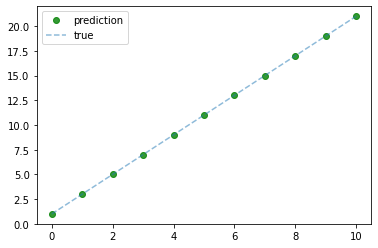

In [18]:
plt.clf() # clear figure
plt.plot(x_train, predicted, 'go', label = "prediction",alpha=0.8)
plt.plot(x_train, y_train, '--', label = "true",alpha=0.5)
plt.legend(loc='best')
plt.show()

## Saving Model

In [20]:
save_model = False
if save_model is True:
  # saves only parameters
  torch.save(model.state_dict(),'awesome_model.pkl')

In [21]:
load_model = False
if load_model is True:
  model.load_state_dict(torch.load('awesome_model.pkl'))

# II. 로지스틱 회귀

## Loading dataset

In [22]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root ='./data',
                            train = True,
                            transform = transforms.ToTensor(),
                            download=True)

len(train_dataset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



60000

<class 'tuple'>
torch.Size([1, 28, 28])
5


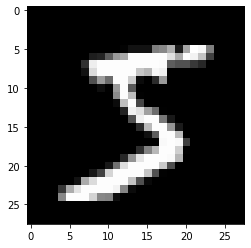

In [39]:
print(type(train_dataset[0]))
print(train_dataset[0][0].size()) # matrix representation of 28x28 bit
print(train_dataset[0][1]) #label
train_dataset[0][0].numpy().shape # tensor는 size, numpy는 shape
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap='gray')

In [41]:
# loading test data
test_dataset = dsets. MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())
len(test_dataset)

10000

## Make Datasets "Iterable"

total data : 60000
minibatch : 100
epoch : 5

iteration : total data / mini-batch x 5 = 600 x 5 = 3000


In [42]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset)/batch_size)
num_epochs = int(num_epochs)


In [43]:
# create Iterable Object
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [45]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [46]:
# check Iterability
import collections
isinstance(train_loader, collections.Iterable)

True

In [54]:
img_1 = np.ones((28,28))
img_2 = np.ones((28,28))
lst = [img_1, img_2]

for i in lst:
  print(i.shape)

(28, 28)
(28, 28)


## building class

In [55]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    out = self.linear(x)
    return out

## LOSS/Optimizer

In [56]:
# check the size of image
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [57]:
# Instantiate model class based on input and output dimension
input_dim = 28*28
output_dim = 10 # 0~9 까지의 10개의 클래스로 분류하는 작업 할것임(목적)
model = LogisticRegressionModel(input_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [64]:
# type of parameter object
print(model.parameters())

# length of parameters
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())
print('28*28*10 = 784 weigths of "FULLY CONNETCTED LAYER"')

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())
print('10*1 = 10 biases of "FULLY CONNETCTED LAYER"')

<generator object Module.parameters at 0x7ff6a4754200>
2
torch.Size([10, 784])
28*28*10 = 784 weigths of "FULLY CONNETCTED LAYER"
torch.Size([10])
10*1 = 10 biases of "FULLY CONNETCTED LAYER"


## Train

https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

아래의 각 iter는 (각각 batch_size=64 의 feature와 label을 포함하는) train_features 와 train_labels 의 **묶음(batch)을 반환합니다.**

    출처: pytorch 공식 문서

https://gaussian37.github.io/dl-pytorch-snippets/#optimizerstep%EC%9D%84-%ED%86%B5%ED%95%9C-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%EC%97%85%EB%8D%B0%EC%9D%B4%ED%8A%B8%EC%99%80-lossbackward%EC%99%80%EC%9D%98-%EA%B4%80%EA%B3%84-1

유용한 정보라서 핀 해둠. 꼭 두고두고 읽어보길

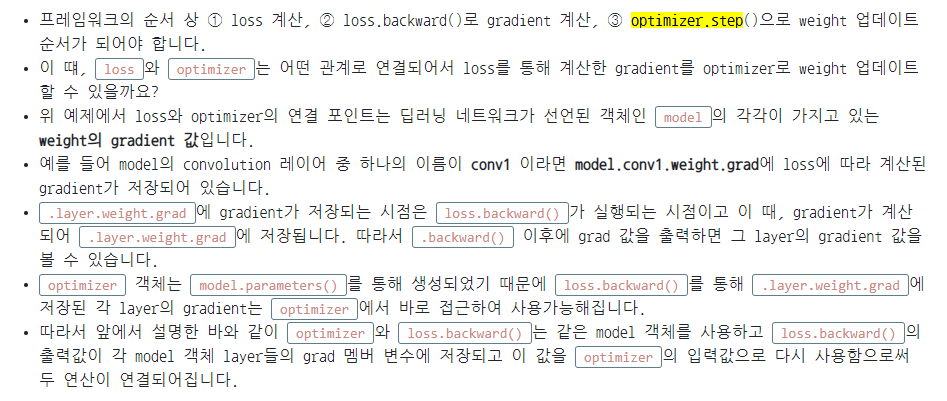

In [108]:
iter = 0
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Load image as variable
    images = images.view(-1, 28* 28).requires_grad_() # 1*28*28 이라서 -1해줌으로서 알아서 하라는 뜻. 굳이 저렇게 안해도 됨.
    labels = labels

    # initiate gradients to zero
    optimizer.zero_grad()

    # forward pass
    outputs = model(images)

    # LOSS
    loss = criterion(outputs, labels)

    # 모델의 변수가 각각 가지고 있는 "gradient를 계산"(by 역전파)
    loss.backward()

    # update parameters
    optimizer.step()

    iter +=1

    # 위에서 구한 gradients로 밑에 test data의 성능을 iteration별로 확인하자!

    if iter%500 ==0: # checkpoint. check accuracy between train and test set
      # calculate accuracy
      correct = 0
      total = 0
      for images, labels in test_loader:
        # load images to torch variable
        images = images.view(-1,28*28).requires_grad_()

        # forward pass only to get logits/output
        outputs = model(images)

        # get predictions from the maximum value
        _, predicted = torch.max(outputs.data,1) # max로 구하는데, 그럼 로지스틱으로 구한 것중에서 가장 확률이 큰 feature를 답을 예측한다. 뭐 이런 컨셉인건가? 좀 나이브 하지 않아?

        # total number of labels
        total += labels.size(0) # size(shape)에서 0번째 값을 반환해준다.

        # total correct predictions
        correct += (predicted == labels).sum() # 이거 iter%500 마다 돌아가도록 설계한거임. 
      
      accuracy = 100*correct/total

      print('Iteration:{}, Loss: {}, Accuracy:{}'.format(iter, loss.item(), accuracy))

Iteration:500, Loss: 0.38686442375183105, Accuracy:87.9800033569336
Iteration:1000, Loss: 0.44327816367149353, Accuracy:88.47000122070312
Iteration:1500, Loss: 0.42054611444473267, Accuracy:88.87999725341797
Iteration:2000, Loss: 0.5263960361480713, Accuracy:89.13999938964844
Iteration:2500, Loss: 0.35255441069602966, Accuracy:89.44000244140625
Iteration:3000, Loss: 0.3473564386367798, Accuracy:89.69999694824219


밑에는 참고될만한 내용들(코드 반환값들, 신택스)

In [85]:
list(enumerate(train_loader))[0]

(0, [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 

⭐이걸 보면 알수 있는게, mini-batch별로 학습을 진행한다는 게 드러난 거임.

train_loader를 Dataloader를 통해 불러왔다고 했는데, 이러면 feature랑 label데이터가 같이 묶음으로 나온다고 했음. 위에 보이는게 그 예시임.

In [73]:
train_dataset[0][0].view(-1,28,28).size()

torch.Size([1, 28, 28])

In [77]:
labels.size(0)

11

In [103]:
a=torch.randn(10)
b=torch.randn(10)
(a==b).sum()

tensor(0)

## Prediction

In [127]:
iter_test = 0
for images, labels in test_loader:
  iter_test += 1
  images = images.view(-1, 28*28).requires_grad_()
  outputs = model(images)
  _, predicted = torch.max(outputs.data, 1) # unpack 2, got 2.
  if iter_test == 1:
    print('OUTPUTS')
    print(outputs.size()) # 100 mini-batch, 10 class output, so 100x10 size tensor is a result
    print(outputs[0,:])
    print('PREDICTED SIZE:{}'.format(predicted.size()))
    


OUTPUTS
torch.Size([100, 10])
tensor([-0.2585, -4.1576, -0.4738,  1.1292, -0.9281, -0.9141, -3.3143,  7.2356,
        -0.3801,  2.2358], grad_fn=<SliceBackward0>)
PREDICTED SIZE:torch.Size([100])


In [129]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
  iter_test += 1
  images = images.view(-1,28*28).requires_grad_()
  outputs = model(images)
  _, predicted = torch.max(outputs.data,1)

  # total number of size
  total += labels.size(0)

  # total correct predictions
  correct += (predicted == labels).sum()

accuracy = 100*(correct.item()/total)
print(accuracy)

89.7


## Saving Model

In [130]:
save_model = False
if save_model is True:
  torch.save(model.state_dict(), 'awesome_model2.pkl')